# LC-MS MS1MS2 pos & neg vs Microbiome

In [1]:
import pandas as pd
import numpy as np
import os
import biom

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

import prince

%matplotlib inline

In [2]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome

In [3]:
# set the directory 
os.chdir('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/MicrobiomeMetabolome')

In [4]:
group_colors = {
    'Bacteria': "#440154FF",        # Dark purple  
    'Climate': "#39558CFF",         # Blue  
    'Fungi': "#238A8DFF",           # Teal  
    'Metabolites_Neg': "#56C667FF", # Green  
    'Metabolites_Pos': "#B8DE29FF", # Yellow-green  
    'Plots': "#DCE318FF",           # Yellow  
    'Wine Chemistry': "#FDE725FF"   # Bright yellow  
}

# Load and Merge all data

### 1. Microbiome data 

In [126]:
df_ITS = pd.read_csv('ITS/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)
df_ITS.head()

,index,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__unidentified;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Leotiomycetes;o__Helotiales;f__Hyaloscyphaceae;g__Hyaloscypha;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Capnodiales;f__Cladosporiaceae;g__Cladosporium;s__Cladosporium_austrohemisphaericum,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Alternaria;s__Alternaria_subcucurbitae,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Botryosphaeriales;f__Planistromellaceae;g__Ramimonilia;s__Ramimonilia_apicalis,k__Fungi;p__Basidiomycota;c__Malasseziomycetes;o__Malasseziales;f__Malasseziaceae;g__Malassezia;s__Malassezia_restricta,k__Fungi;p__Ascomycota;c__unidentified;o__unidentified;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__Alternaria;s__Alternaria_eureka,k__Fungi;p__Basidiomycota;c__Microbotryomycetes;o__Sporidiobolales;f__Sporidiobolaceae;g__Rhodotorula;s__Rhodotorula_graminis,...,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Didymosphaeriaceae;g__Paracamarosporium;s__Paracamarosporium_hawaiiense,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Pleosporales;f__Pleosporaceae;g__unidentified;s__unidentified,k__Fungi;p__Basidiomycota;c__Pucciniomycetes;o__Pucciniales;f__Melampsoraceae;g__Melampsora;s__Melampsora_epitea,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Dothideales;f__Dothioraceae;g__Hormonema;s__Hormonema_macrosporum,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Clavicipitaceae;g__Claviceps;s__Claviceps_purpurea,k__Fungi;p__Ascomycota;c__Eurotiomycetes;o__Chaetothyriales;f__unidentified;g__unidentified;s__unidentified,k__Fungi;p__Ascomycota;c__Dothideomycetes;o__Dothideales;f__Dothideaceae;g__Endoconidioma;s__Endoconidioma_populi,k__Fungi;p__Ascomycota;c__Arthoniomycetes;o__Lichenostigmatales;f__Phaeococcomycetaceae;g__Phaeococcomyces;s__unidentified,k__Fungi;p__Ascomycota;c__Sordariomycetes;o__Hypocreales;f__Hypocreales_fam_Incertae_sedis;g__Acremonium;s__unidentified,k__Fungi;p__Ascomycota;c__Lecanoromycetes;o__Teloschistales;f__Teloschistaceae;g__Gallowayella;s__Gallowayella_poeltii
0,PostMLF_2023_Plot4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_16S = pd.read_csv('16S/PostMLF_cOTUs_rarefied_labled.tsv', sep='\t', index_col=0)

# drop E. Coli because it skews the distribution majorly 
# MFA loading = Inf 
df_16S.drop(columns=['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Escherichia-Shigella; s__Escherichia_coli'], inplace=True)

df_16S.head()

,index,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Solirubrobacterales; f__Solirubrobacteraceae; g__Solirubrobacter; s__bacterium_Ellin6048,d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__Acetobacter_cerevisiae,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Pseudonocardiales; f__Pseudonocardiaceae; g__Actinomycetospora; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Leuconostocaceae; g__Oenococcus; s__Oenococcus_oeni,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_Planctomycetaceae,d__Bacteria; p__Methylomirabilota; c__Methylomirabilia; o__Rokubacteriales; f__Rokubacteriales; g__Rokubacteriales; s__uncultured_bacterium,d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__uncultured_Alphaproteobacteria,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Verrucomicrobiota; c__Verrucomicrobiae; o__Pedosphaerales; f__Pedosphaeraceae; g__uncultured; s__uncultured_bacterium,...,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Corynebacteriales; f__Mycobacteriaceae; g__Mycobacterium; s__Mycobacterium_sp.,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia; f__Hungateiclostridiaceae; g__Ruminiclostridium; s__Ruminiclostridium_hungatei,d__Bacteria; p__Chloroflexi; c__TK10; o__TK10; f__TK10; g__TK10; s__uncultured_bacterium.2,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.2,d__Bacteria; p__Chloroflexi; c__Anaerolineae; o__SBR1031; f__A4b; g__A4b; s__metagenome,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Gaiellales; f__uncultured; g__uncultured; s__uncultured_microorganism,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_bacterium.3,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Salmonella; s__Salmonella_enterica,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.3
0,PostMLF_2023_Plot4,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2023_Plot13,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2,PostMLF_2023_Plot9,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2023_Plot5,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot17,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Metabolites

In [128]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Pos_MS1MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Pos = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Pos.shape

(31, 1946)

In [129]:
df_wMetadata_cleaned_collapsed = pd.read_csv('/home/lfloerl/cloud/lfloerl/Microterroir/LC-MS_data/Results/Neg_MS1MS2_OutlierRemoved.csv', index_col=0)
postMLF_df_Neg = df_wMetadata_cleaned_collapsed[df_wMetadata_cleaned_collapsed['sample_type'] == 'PostMLF'].reset_index()
postMLF_df_Neg.shape

(31, 1393)

In [130]:
postMLF_df_all = pd.merge(postMLF_df_Pos, postMLF_df_Neg, on=('Sample Name', 'sample_type', 'year', 'plot'), how='outer')
postMLF_df_all.shape

(31, 3335)

### 3. Climate, Plot MD and Wine Chemistry

In [131]:
# CHEMISTRY
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/Raw-MD_Vineyard_MV_data.csv')
md["Plot_str"] = "Plot" + md["Plot"].astype(str)
md_wine_chemistry = md[['Plot_str', 'Year', 'Must_Oechsle', 'Wine_Tartatic_Acid', 
                        'Wine_Malic_Acid', 'Wine_Glucose', 'Wine_Fructose', 
                        'Wine_Lactic_Acid', 'Wien_Glycerol', 'Wine_Acetic_Acid']]

df_merged_1 = postMLF_df_all.merge(md_wine_chemistry, left_on=["plot", "year"], right_on=["Plot_str", "Year"], how="inner")
df_merged_1 = df_merged_1.drop(columns=['Plot_str', 'Year', 'sample_type']).dropna()

df_merged_1.head()

,Sample Name,year,plot,(+)-6-epi-stephacidin A,(+)-ochromycinone,(+)-ochromycinone.1,"(-)-11-hydroxy-9,10-dihydrojasmonic acid 11-beta-D-glucoside",(-)-Lamivudine,(-)-Lamivudine.1,(-)-Salsoline,...,α-hydroxyacetovanillone,β-D-Glucopyranuronic acid,Must_Oechsle,Wine_Tartatic_Acid,Wine_Malic_Acid,Wine_Glucose,Wine_Fructose,Wine_Lactic_Acid,Wien_Glycerol,Wine_Acetic_Acid
0,PostMLF_2021_Plot11,2021,Plot11,-0.679276,0.191048,1.709113,-1.337482,-0.806997,-1.008542,-1.265860,...,-0.606316,0.821080,75.0,3.42,0.06,0.33,0.30,1.87,7.13,1.03
1,PostMLF_2021_Plot13,2021,Plot13,-0.620487,0.139359,1.880671,-1.268509,0.079603,-0.809821,-0.281844,...,-0.758207,0.627574,75.0,2.61,0.09,0.33,0.28,1.53,7.13,0.68
2,PostMLF_2021_Plot14,2021,Plot14,-0.258942,0.541058,1.079110,-0.987094,-0.137637,-0.468563,-0.392728,...,-0.601279,0.587509,78.0,3.06,0.06,0.34,0.29,1.47,6.90,0.77
3,PostMLF_2021_Plot15,2021,Plot15,-0.466123,0.648157,1.948666,-1.291637,-0.644351,-0.656881,-0.459233,...,-0.599207,-0.554780,73.0,3.43,0.07,0.33,0.30,1.69,6.29,0.75
4,PostMLF_2021_Plot17,2021,Plot17,-0.594154,0.575244,1.414531,-1.177630,0.921296,1.072237,-1.230299,...,-0.636694,0.808613,73.0,3.06,0.15,0.42,0.29,1.79,7.24,0.81


In [132]:
# PLOTS
md_plots = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux_plots.csv')
md_plots["Plot_str"] = "Plot" + md_plots["Plot"].astype(str)
md_plots_subset =  md_plots[['Plot_str', 'Altitude', 'Average_slope', 'Exposition', 'Average_radiation', 'Geology', 'Hydromorphie_code']]
# Convert categorical columns to dummy variables
categorical_cols = ['Exposition', 'Geology']
md_plots_subset_dummies = pd.get_dummies(md_plots_subset, columns=categorical_cols, drop_first=True)
# Convert boolean columns to integers (0 or 1)
boolean_columns = md_plots_subset_dummies.select_dtypes(include='bool').columns
md_plots_subset_dummies[boolean_columns] = md_plots_subset_dummies[boolean_columns].astype(int)

df_merged_2 = df_merged_1.merge(md_plots_subset_dummies, left_on=["plot"], right_on=["Plot_str"], how="inner")
df_merged_2 = df_merged_2.drop(columns=['Plot_str']).dropna()

df_merged_2.head()

,Sample Name,year,plot,(+)-6-epi-stephacidin A,(+)-ochromycinone,(+)-ochromycinone.1,"(-)-11-hydroxy-9,10-dihydrojasmonic acid 11-beta-D-glucoside",(-)-Lamivudine,(-)-Lamivudine.1,(-)-Salsoline,...,Wien_Glycerol,Wine_Acetic_Acid,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse
0,PostMLF_2021_Plot11,2021,Plot11,-0.679276,0.191048,1.709113,-1.337482,-0.806997,-1.008542,-1.265860,...,7.13,1.03,490,20,937.5,1,0,0,1,0
1,PostMLF_2021_Plot13,2021,Plot13,-0.620487,0.139359,1.880671,-1.268509,0.079603,-0.809821,-0.281844,...,7.13,0.68,580,30,937.5,1,1,0,0,1
2,PostMLF_2021_Plot14,2021,Plot14,-0.258942,0.541058,1.079110,-0.987094,-0.137637,-0.468563,-0.392728,...,6.90,0.77,440,25,912.5,1,0,0,0,0
3,PostMLF_2021_Plot15,2021,Plot15,-0.466123,0.648157,1.948666,-1.291637,-0.644351,-0.656881,-0.459233,...,6.29,0.75,520,30,912.5,0,1,0,1,0
4,PostMLF_2021_Plot17,2021,Plot17,-0.594154,0.575244,1.414531,-1.177630,0.921296,1.072237,-1.230299,...,7.24,0.81,390,20,912.5,1,1,0,0,1


In [133]:
# CLIMATE
md_climate = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/RawMD-Lavaux-Climate.csv', index_col=0)
# Remove underscores from the 'Plot' column
md_climate['Plot'] = md_climate['Plot'].str.replace('_', '', regex=False)
# include more climate data 
#md_climate_subset = md_climate[['Plot', 'Year', 'cv_rh', 'average_rh', 'cv_temperature', 'accumulated_temperature', 'average_temperature']]
# minimum 
md_climate_subset = md_climate[['Plot', 'Year',  'average_rh','average_temperature']]

df_merged_3 = df_merged_2.merge(md_climate_subset, left_on=["plot", "year"], right_on=["Plot", "Year"], how="inner")
df_merged_3 = df_merged_3.drop(columns=['Plot', 'Year']).dropna()

df_merged_3.head()

,Sample Name,year,plot,(+)-6-epi-stephacidin A,(+)-ochromycinone,(+)-ochromycinone.1,"(-)-11-hydroxy-9,10-dihydrojasmonic acid 11-beta-D-glucoside",(-)-Lamivudine,(-)-Lamivudine.1,(-)-Salsoline,...,Altitude,Average_slope,Average_radiation,Hydromorphie_code,Exposition_South-West,Geology_Colluvium,Geology_Gravel_moraine,Geology_Molasse,average_rh,average_temperature
0,PostMLF_2021_Plot11,2021,Plot11,-0.679276,0.191048,1.709113,-1.337482,-0.806997,-1.008542,-1.265860,...,490,20,937.5,1,0,0,1,0,71.948958,17.964399
1,PostMLF_2021_Plot13,2021,Plot13,-0.620487,0.139359,1.880671,-1.268509,0.079603,-0.809821,-0.281844,...,580,30,937.5,1,1,0,0,1,71.334895,17.544612
2,PostMLF_2021_Plot14,2021,Plot14,-0.258942,0.541058,1.079110,-0.987094,-0.137637,-0.468563,-0.392728,...,440,25,912.5,1,0,0,0,0,70.767447,18.343627
3,PostMLF_2021_Plot15,2021,Plot15,-0.466123,0.648157,1.948666,-1.291637,-0.644351,-0.656881,-0.459233,...,520,30,912.5,0,1,0,1,0,72.104023,17.892713
4,PostMLF_2021_Plot17,2021,Plot17,-0.594154,0.575244,1.414531,-1.177630,0.921296,1.072237,-1.230299,...,390,20,912.5,1,1,0,0,1,72.076768,18.476535


In [134]:
## add microbiome 
df_merged_4 = df_merged_3.merge(df_ITS, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_4 = df_merged_4.drop(columns=['index']).dropna()

df_merged_all = df_merged_4.merge(df_16S, left_on=["Sample Name"], right_on=["index"], how="inner")
df_merged_all = df_merged_all.drop(columns=['index']).dropna()


df_merged_all.head() 

,Sample Name,year,plot,(+)-6-epi-stephacidin A,(+)-ochromycinone,(+)-ochromycinone.1,"(-)-11-hydroxy-9,10-dihydrojasmonic acid 11-beta-D-glucoside",(-)-Lamivudine,(-)-Lamivudine.1,(-)-Salsoline,...,d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Corynebacteriales; f__Mycobacteriaceae; g__Mycobacterium; s__Mycobacterium_sp.,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__uncultured; s__uncultured_bacterium,d__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridia; f__Hungateiclostridiaceae; g__Ruminiclostridium; s__Ruminiclostridium_hungatei,d__Bacteria; p__Chloroflexi; c__TK10; o__TK10; f__TK10; g__TK10; s__uncultured_bacterium.2,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.2,d__Bacteria; p__Chloroflexi; c__Anaerolineae; o__SBR1031; f__A4b; g__A4b; s__metagenome,d__Bacteria; p__Actinobacteriota; c__Thermoleophilia; o__Gaiellales; f__uncultured; g__uncultured; s__uncultured_microorganism,d__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_bacterium.3,d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales; f__Enterobacteriaceae; g__Salmonella; s__Salmonella_enterica,d__Bacteria; p__Acidobacteriota; c__Vicinamibacteria; o__Vicinamibacterales; f__Vicinamibacteraceae; g__Vicinamibacteraceae; s__uncultured_bacterium.3
0,PostMLF_2021_Plot11,2021,Plot11,-0.679276,0.191048,1.709113,-1.337482,-0.806997,-1.008542,-1.265860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PostMLF_2021_Plot13,2021,Plot13,-0.620487,0.139359,1.880671,-1.268509,0.079603,-0.809821,-0.281844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,PostMLF_2021_Plot14,2021,Plot14,-0.258942,0.541058,1.079110,-0.987094,-0.137637,-0.468563,-0.392728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PostMLF_2021_Plot17,2021,Plot17,-0.594154,0.575244,1.414531,-1.177630,0.921296,1.072237,-1.230299,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PostMLF_2021_Plot19,2021,Plot19,-0.559695,0.357584,1.600124,-0.807646,0.382065,-0.502349,-1.355855,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [135]:
# Keep track of the columns' origins
Fun_columns = df_ITS.iloc[:, 1:].columns.tolist()
Bac_columns = df_16S.iloc[:, 1:].columns.tolist()
metabolites_Neg_columns = postMLF_df_Neg.iloc[:, 4:].columns.tolist()
metabolites_Pos_columns = postMLF_df_Pos.iloc[:, 4:].columns.tolist()
wine_chemistry_columns = md_wine_chemistry.iloc[:, 2:].columns.tolist()
plots_columns = md_plots_subset_dummies.iloc[:, 1:].columns.tolist()
climate_columns = md_climate_subset.iloc[:, 2:].columns.tolist()
metadata_columns = ['Sample Name', 'year', 'plot']

In [136]:
# Create a multi-index column structure
multi_index_columns = (
    [('Metabolites_Pos', col) for col in metabolites_Pos_columns] +
    [('Metabolites_Neg', col) for col in metabolites_Neg_columns] +
    [('Wine Chemistry', col) for col in wine_chemistry_columns] +
    [('Plots', col) for col in plots_columns] +
    [('Climate', col) for col in climate_columns] +
    [('Fungi', col) for col in Fun_columns] +
    [('Bacteria', col) for col in Bac_columns])

# Subset data and assign multi-index
df_metadata = df_merged_all[metadata_columns]  # Keep metadata separately
df_mfa = df_merged_all.drop(columns=metadata_columns)  # Drop metadata
df_mfa.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa = df_mfa.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa.columns.levels[0].tolist()

df_mfa.shape

['Bacteria',
 'Climate',
 'Fungi',
 'Metabolites_Neg',
 'Metabolites_Pos',
 'Plots',
 'Wine Chemistry']

In [ ]:
# drop columns with zero variance 
zero_var_cols = df_mfa.std() == 0
df_mfa = df_mfa.loc[:, ~zero_var_cols]

df_mfa.shape

In [137]:
# Check if there are any NaN values in df_mfa
nan_cells = df_mfa.isna().sum().sum()
print(f"Total NaN cells in df_mfa: {nan_cells}")

Total NaN cells in df_mfa: 0


In [138]:
df_mfa.shape

(22, 3528)

# MFA 

## How many Components?

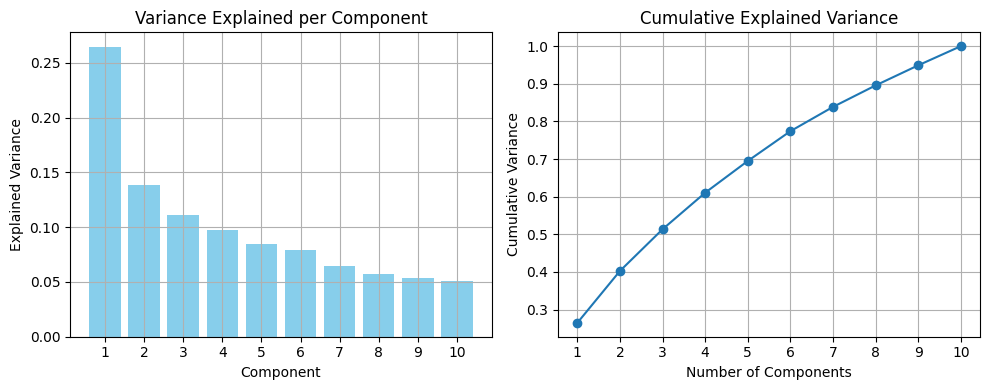

In [70]:
# Define the number of components to test
n_components = 10

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [119]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.509,21.44%,21.44%
1,2.352,11.19%,32.63%
2,1.890,8.99%,41.62%
3,1.655,7.87%,49.49%
4,1.439,6.84%,56.33%


In [ ]:
partial_coords = mfa.partial_row_coordinates(df_mfa)

# Assuming `partial_coords` is the dataframe you obtained from MFA
df_abs_sum = partial_coords.abs().sum()

# Convert to DataFrame for plotting
df_plot = df_abs_sum.groupby(level=0).sum().reset_index()
df_plot.columns = ['Group', 'Sum of Contributions']

# Plot
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Group', y='Sum of Contributions', data=df_plot, palette='viridis')
# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Summed Absolute Contribution')
plt.show()

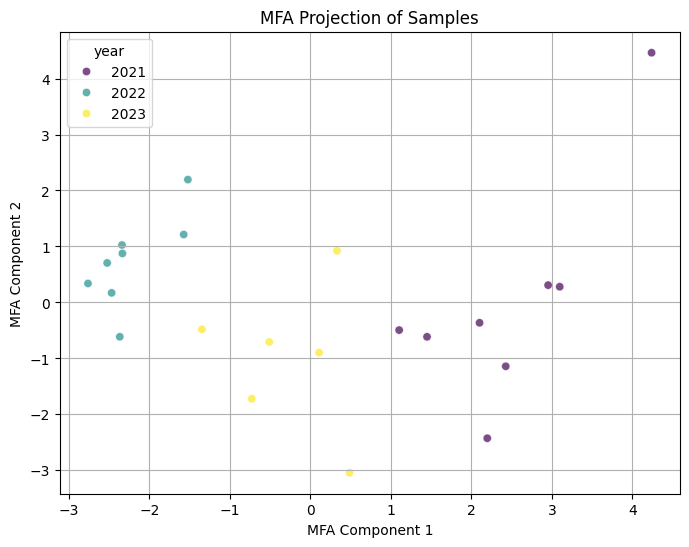

In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [111]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

variable_loadings_df.head()

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
2627,"(Metabolites_Pos, Glutathione)",0.732229,-0.519750,1.251978,Metabolites_Pos
238,"(Metabolites_Neg, (R)-3-((R)-3-Hydroxybutanoyl...",0.888996,-0.361585,1.250581,Metabolites_Neg
322,"(Metabolites_Neg, 2,5-Dihydroxybenzaldehyde.1)",-0.664897,0.571561,1.236458,Metabolites_Neg
2464,"(Metabolites_Pos, Diprotin B)",0.834323,-0.398318,1.232641,Metabolites_Pos
92,"(Climate, average_temperature)",-0.740557,-0.475418,1.215975,Climate


In [112]:
var_list = variable_loadings_df['Variable'].to_list()
var_list

[('Metabolites_Pos', 'Glutathione'),
 ('Metabolites_Neg', '(R)-3-((R)-3-Hydroxybutanoyloxy)butanoate'),
 ('Metabolites_Neg', '2,5-Dihydroxybenzaldehyde.1'),
 ('Metabolites_Pos', 'Diprotin B'),
 ('Climate', 'average_temperature'),
 ('Metabolites_Pos', '4-(3-Hydroxybutyl)-2-methoxyphenyl hydrogen sulfate'),
 ('Metabolites_Pos', 'Fenbendazole'),
 ('Metabolites_Pos', '4-Quinolinecarboxylicacid'),
 ('Metabolites_Neg', 'Calditol'),
 ('Metabolites_Pos', 'Reserpine'),
 ('Metabolites_Neg', '(-)threo-iso(homo)3citrate'),
 ('Metabolites_Neg',
  'N1-bicyclo[2.2.1]hept-5-en-2-yl-2-{2-[(2-nitrophenyl)thio]acetyl}hydrazine-1-carbothioamide'),
 ('Metabolites_Pos',
  'tert-Butyl N-[1-(aminocarbonyl)-3-methylbutyl]carbamate.1'),
 ('Metabolites_Pos', 'nifluridide'),
 ('Metabolites_Pos', 'Cidofovir anhydrous'),
 ('Metabolites_Pos', 'Megalomicin C1'),
 ('Metabolites_Pos', 'Maniwamycin C.2'),
 ('Climate', 'average_rh'),
 ('Metabolites_Pos',
  'tert-Butyl N-[1-(aminocarbonyl)-3-methylbutyl]carbamate.2'),
 ('

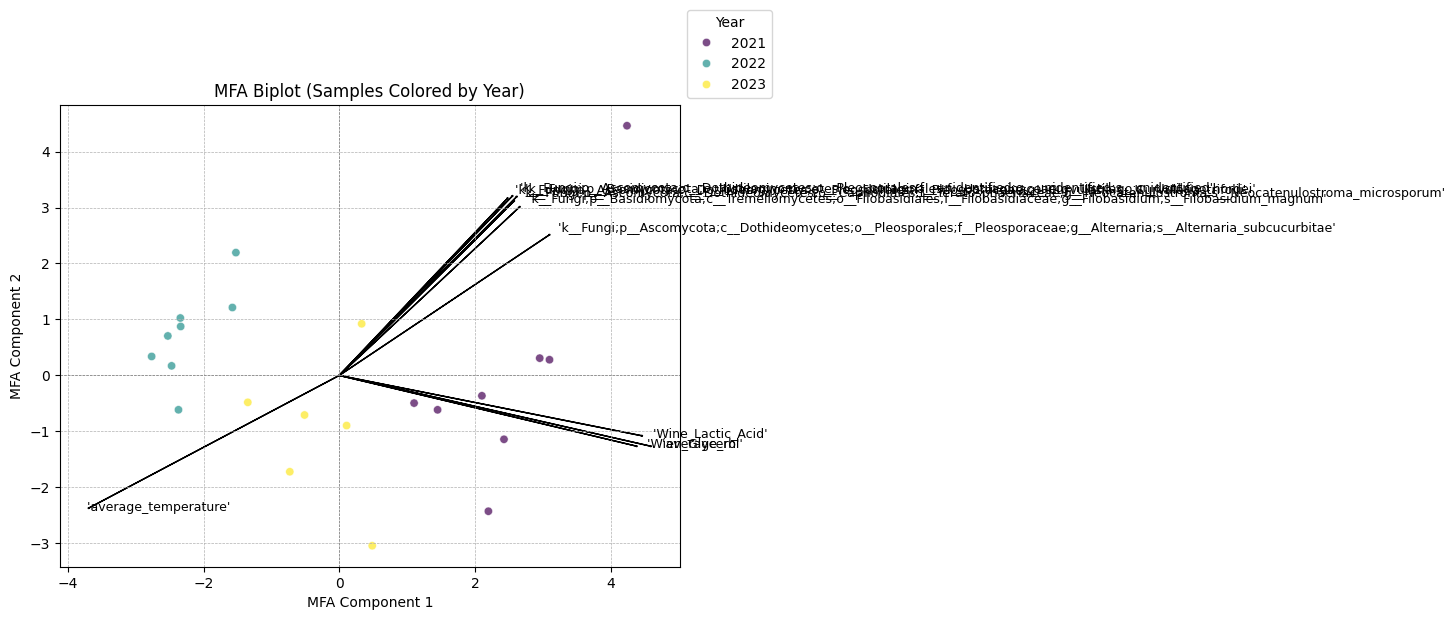

In [76]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)


# Define a scaling factor to extend the arrows
scaling_factor = 5 # Adjust this value to control arrow length
# Plot the top loadings as arrows
for i, row in top_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)


# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Samples Colored by Year)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# All

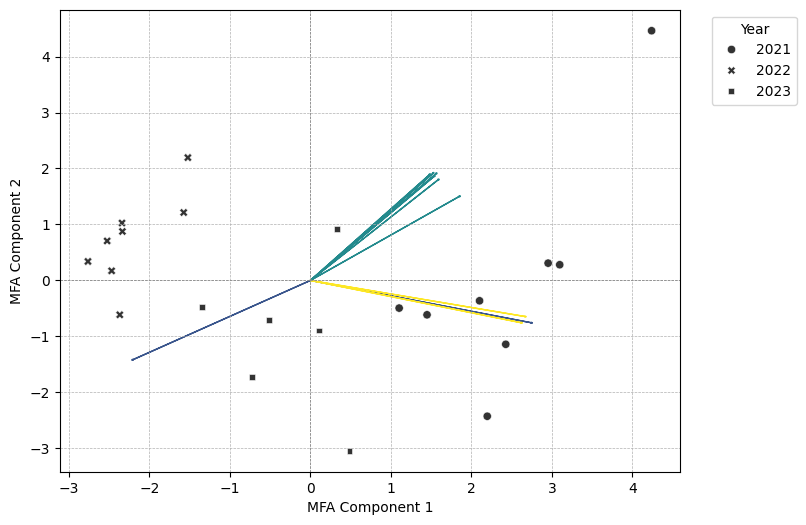

In [118]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])


# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")


# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


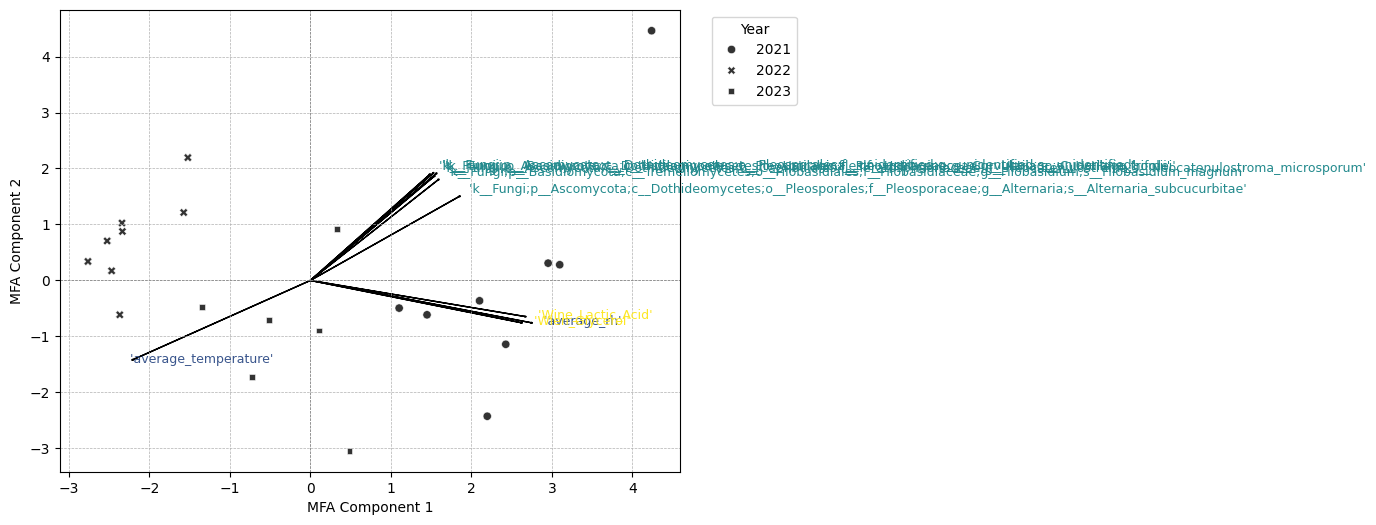

In [114]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], style="year", alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])

# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color='black', length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  # Adjust text position accordingly
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9, color=group_color)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")

# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()


In [106]:
# Compute the total influence per group as the sum of squared loadings
group_influence = variable_loadings_df.groupby("group")[["MFA Comp 1", "MFA Comp 2"]].apply(lambda x: (x**2).sum())

# Sort to see which groups contribute the most
group_influence = group_influence.sort_values(by=["MFA Comp 1", "MFA Comp 2"], ascending=False)

# Compute total influence per group
group_influence["Total Influence"] = group_influence["MFA Comp 1"] + group_influence["MFA Comp 2"]

# Sort groups by total influence
group_influence = group_influence.sort_values(by="Total Influence", ascending=False)

/scratch/lfloerl/tmpdata/ipykernel_2597569/3740350339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette=palette)


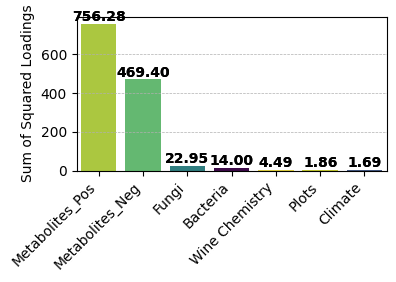

In [107]:
# Define custom colors for each group
palette = [group_colors.get(group, "#808080") for group in group_influence.index]  # Default gray if not specified

# Plot
plt.figure(figsize=(4, 2))
ax = sns.barplot(data=group_influence.reset_index(), x="group", y="Total Influence", palette=palette)

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add numeric values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("Sum of Squared Loadings")
plt.title("")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

## Seperate Biplots

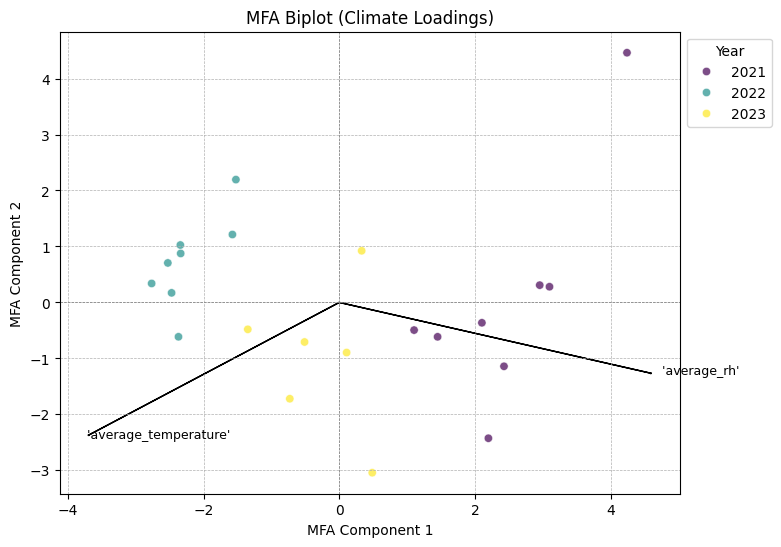

In [77]:
# Select only the "Climate" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Climate"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Climate Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

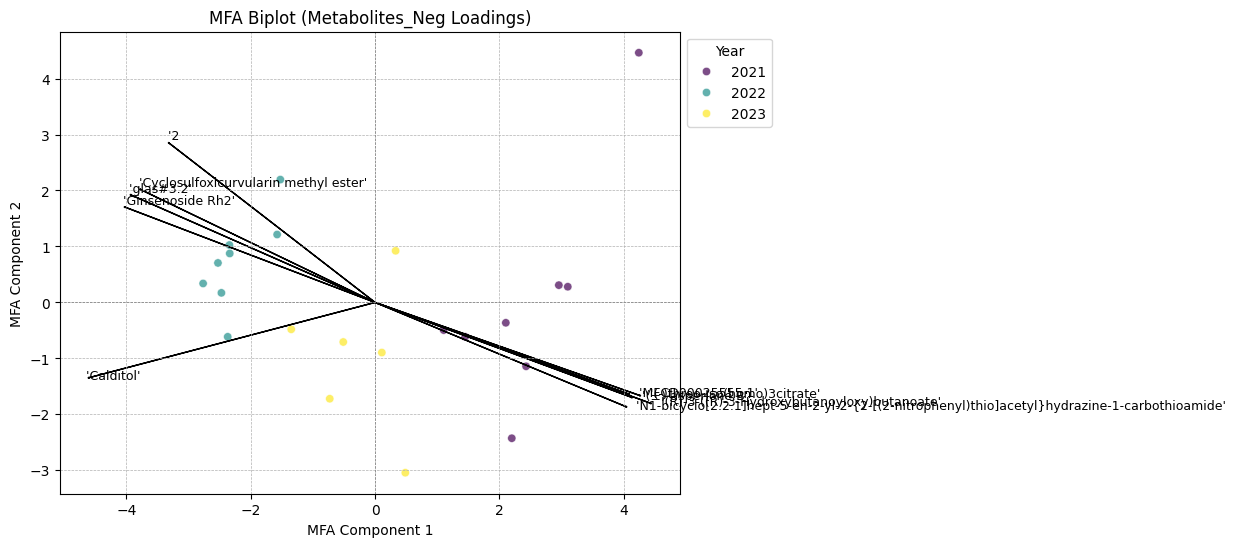

In [95]:
# Select only the 'Metabolites_Neg' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Metabolites_Neg']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Neg Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

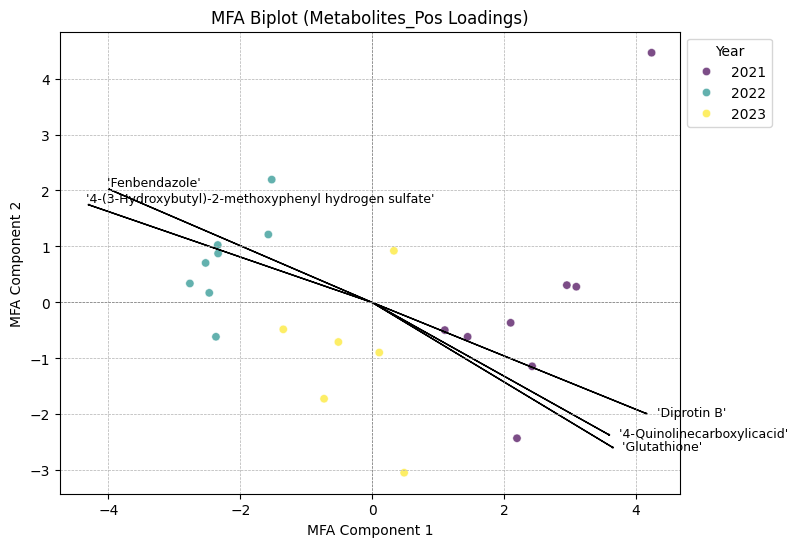

In [93]:
# Select only the 'Metabolites_Pos' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Metabolites_Pos']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(5, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Metabolites_Pos Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

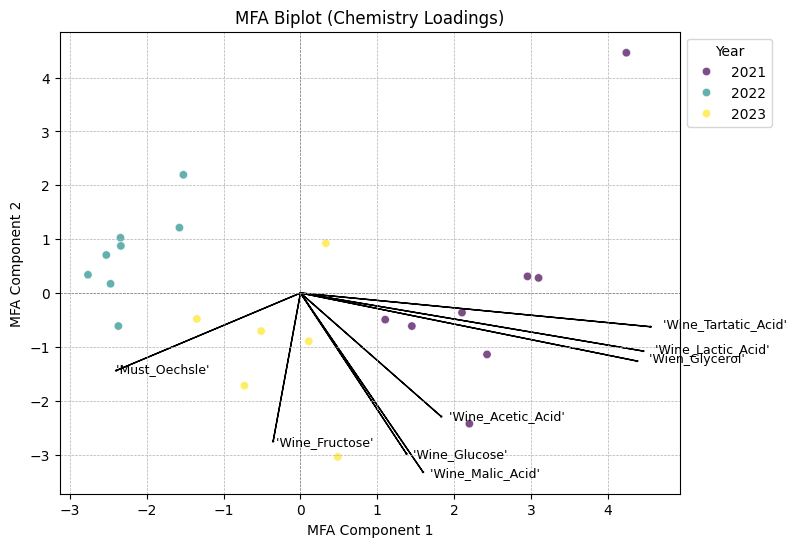

In [84]:
# Select only the 'Wine Chemistry' group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == 'Wine Chemistry']

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Chemistry Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

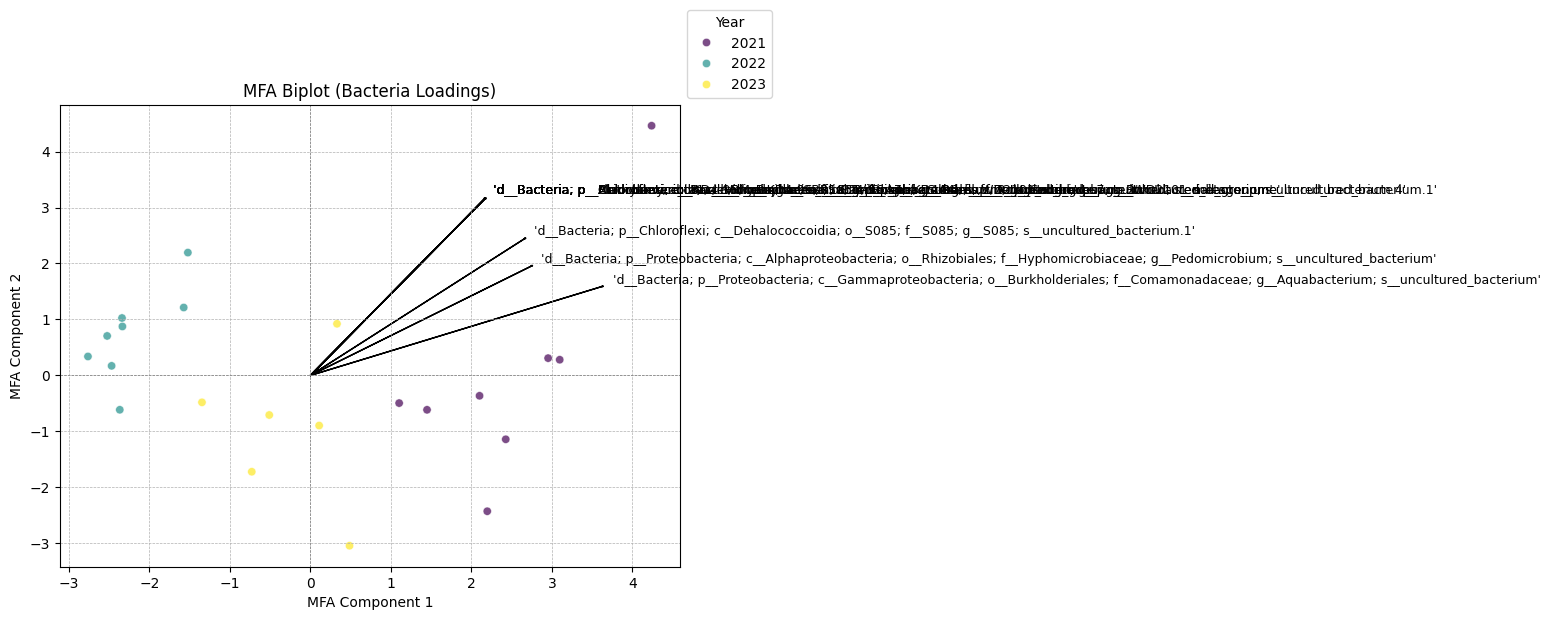

In [92]:
# Select only the "Bacteria" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Bacteria"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Bacteria Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

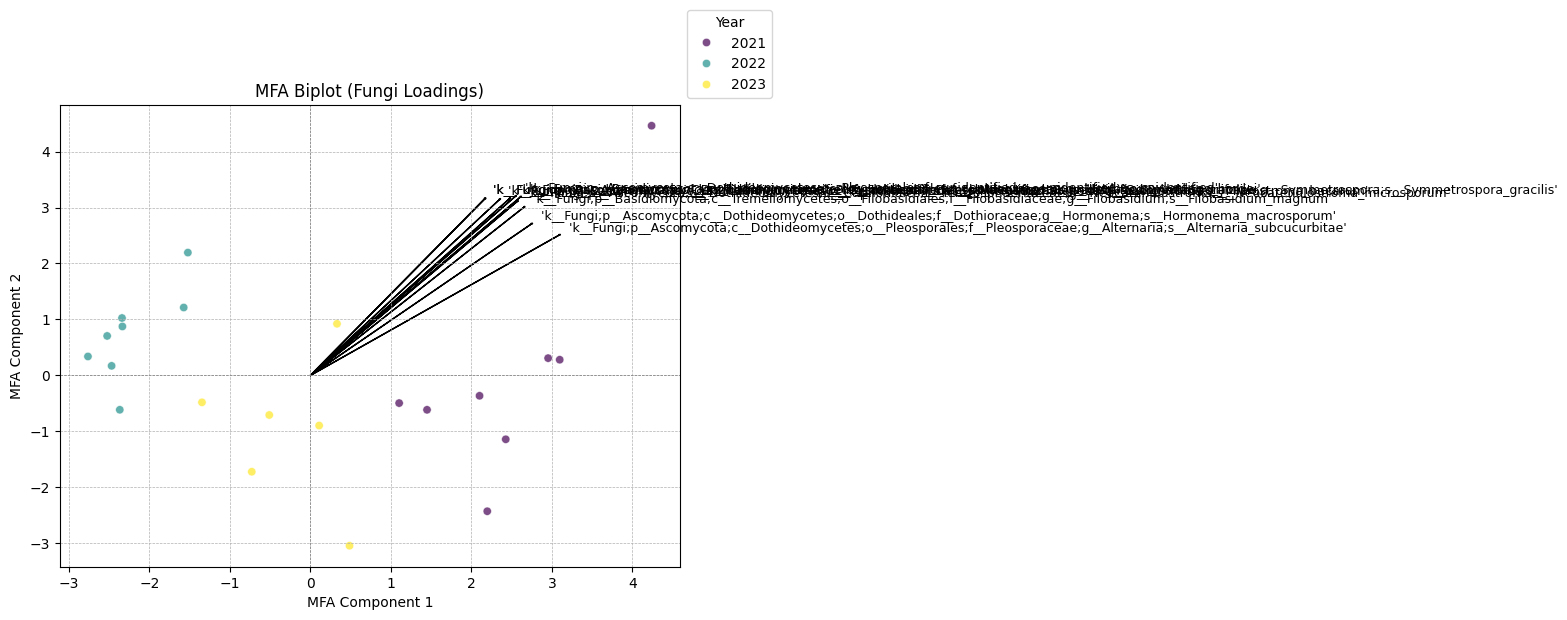

In [90]:
# Select only the "Fungi" group
select_loadings_df = variable_loadings_df[variable_loadings_df["group"] == "Fungi"]

# Select top 10 based on Loadings Contribution
top_select_loadings = select_loadings_df.nlargest(10, "Loadings Contribution")
top_select_loadings['Variable'] = top_select_loadings['Variable'].astype(str).str.split(',').str[1].str.strip(')')

# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)

# Define a scaling factor for arrows
scaling_factor = 5

# Plot the top climate loadings as arrows
for i, row in top_select_loadings.iterrows():
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color="black", length_includes_head=True)
    
    ax.text(row["MFA Comp 1"] * (scaling_factor + 0.1),  
            row["MFA Comp 2"] * (scaling_factor + 0.1), 
            row["Variable"], fontsize=9)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("MFA Biplot (Fungi Loadings)")
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1, 1))

plt.show()

# MFA single year

## How many Components?

In [148]:
df_mfa_year = df_merged_all[(df_merged_all['year'] == 2021)]

# Subset data and assign multi-index
df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata
df_mfa_year.columns = pd.MultiIndex.from_tuples(multi_index_columns)  # Assign multi-index
df_mfa_year = df_mfa_year.astype("float64")

# Extract the group names (first level of multi-index)
groups = df_mfa_year.columns.levels[0].tolist()
groups

/scratch/lfloerl/tmpdata/ipykernel_2597569/1619464699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mfa_year.drop(columns=metadata_columns, inplace=True)  # Drop metadata


['Bacteria',
 'Climate',
 'Fungi',
 'Metabolites_Neg',
 'Metabolites_Pos',
 'Plots',
 'Wine Chemistry']

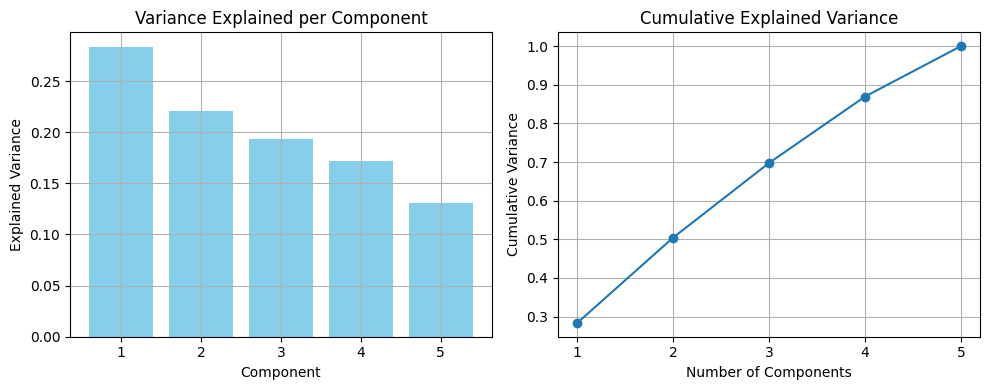

In [151]:
# Define the number of components to test
n_components = 5

# Define MFA and fit the model
mfa = prince.MFA(
    n_components=n_components,  
    n_iter=3, 
    copy=True,
    check_input=True,
    random_state=42)

# Fit MFA to the data (excluding metadata columns)
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

# Get explained variance per component
explained_variance_ratio = mfa.eigenvalues_ / np.sum(mfa.eigenvalues_)

# Create subplots for explained variance and cumulative variance plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot for variance explained per component
axes[0].bar(range(1, n_components + 1), explained_variance_ratio[:n_components], color='skyblue')
axes[0].set_title('Variance Explained per Component')
axes[0].set_xlabel('Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_xticks(range(1, n_components + 1))
axes[0].grid(True)

# Line plot for cumulative explained variance (elbow plot)
axes[1].plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio[:n_components]), marker='o', linestyle='-')
axes[1].set_title('Cumulative Explained Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].set_xticks(range(1, n_components + 1))
axes[1].grid(True)

# Adjust layout to ensure proper display
plt.tight_layout()
plt.show()

In [152]:
# Initialize MFA model
mfa = prince.MFA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit MFA with multi-index groups
mfa = mfa.fit(
    df_mfa_year,
    groups=groups,
    supplementary_groups=None)

mfa_results = mfa.transform(df_mfa_year)
# Merge MFA results with metadata to retain 'year' information
mfa_results = mfa_results.merge(df_metadata, left_index=True, right_index=True)

mfa.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.856,23.26%,23.26%
1,3.784,18.12%,41.38%
2,3.307,15.84%,57.21%
3,2.942,14.09%,71.30%
4,2.236,10.71%,82.01%


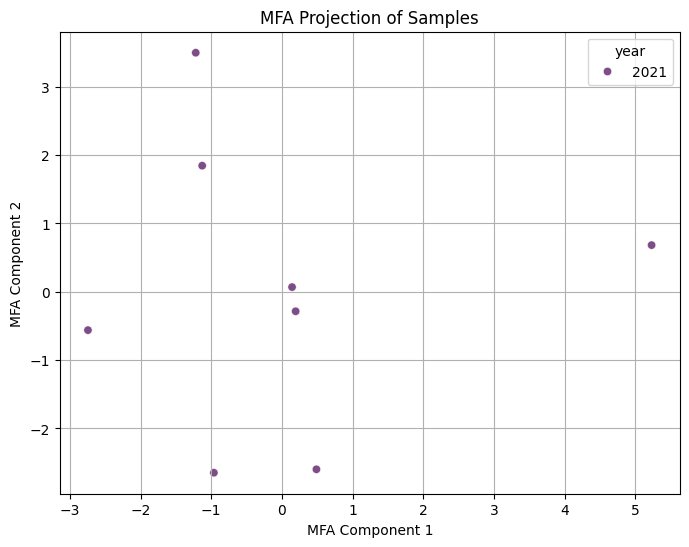

In [153]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], hue="year", palette="viridis", alpha=0.7)
plt.xlabel("MFA Component 1")
plt.ylabel("MFA Component 2")
plt.title("MFA Projection of Samples")
plt.grid()
plt.show()

In [154]:
# Extract coordinates of individuals (rows)
individuals = mfa_results.iloc[:, :2].values  # First 2 components

# Extract variable loadings (correlations with MFA axes)
variable_loadings = mfa.column_correlations.iloc[:, :2]

# Drop the multi-index
variable_loadings_df = variable_loadings.reset_index()

# Rename columns
variable_loadings_df.columns = ["Variable", "MFA Comp 1", "MFA Comp 2"]

# Compute Loadings contribution (sum of squared correlations)
variable_loadings_df["Loadings Contribution"] = ( variable_loadings_df["MFA Comp 1"].abs() + variable_loadings_df["MFA Comp 2"].abs())

# Sort by Loadings contribution in descending order
variable_loadings_df = variable_loadings_df.sort_values(by="Loadings Contribution", ascending=False)

variable_loadings_df["group"] = variable_loadings_df["Variable"].apply(lambda x: x[0])

variable_loadings_df.head()

,Variable,MFA Comp 1,MFA Comp 2,Loadings Contribution,group
1,"(Bacteria, d__Bacteria; p__Proteobacteria; c__...",-inf,-inf,inf,Bacteria
6,"(Bacteria, d__Bacteria; p__Proteobacteria; c__...",-inf,inf,inf,Bacteria
4,"(Bacteria, d__Bacteria; p__Planctomycetota; c_...",-inf,inf,inf,Bacteria
3322,"(Metabolites_Pos, Sophoracoumestan A)",-0.595134,0.770884,1.366018,Metabolites_Pos
473,"(Metabolites_Neg, 4-Bromophenylthiourea)",-0.614054,0.750054,1.364108,Metabolites_Neg


In [155]:
var_list = variable_loadings_df['Variable'].to_list()
var_list

[('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__Acetobacter_cerevisiae'),
 ('Bacteria',
  'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Acetobacterales; f__Acetobacteraceae; g__Acetobacter; s__uncultured_Alphaproteobacteria'),
 ('Bacteria',
  'd__Bacteria; p__Planctomycetota; c__Planctomycetes; o__Pirellulales; f__Pirellulaceae; g__Pirellula; s__uncultured_Planctomycetaceae'),
 ('Metabolites_Pos', 'Sophoracoumestan A'),
 ('Metabolites_Neg', '4-Bromophenylthiourea'),
 ('Metabolites_Pos', 'Adenine'),
 ('Metabolites_Neg',
  '2-[(3S)-1-(Cyclohexylmethyl)-3-pyrrolidinyl]-5-fluoro-1H-benzimidazole'),
 ('Metabolites_Pos', 'Pinastric acid'),
 ('Metabolites_Neg',
  'N-({(2R,4S,5R)-5-[3-(4-Fluorophenyl)-1-methyl-1H-pyrazol-5-yl]-1-azabicyclo[2.2.2]oct-2-yl}methyl)-4-methoxybenzamide'),
 ('Metabolites_Neg', 'Netropsin.2'),
 ('Metabolites_Neg',
  '1,4-bis[(2-ethylhexyl)oxy]-1,4-dioxobutane-2-sulfonic

/scratch/lfloerl/tmpdata/ipykernel_2597569/3882181659.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Year", bbox_to_anchor=(1.2, 1))


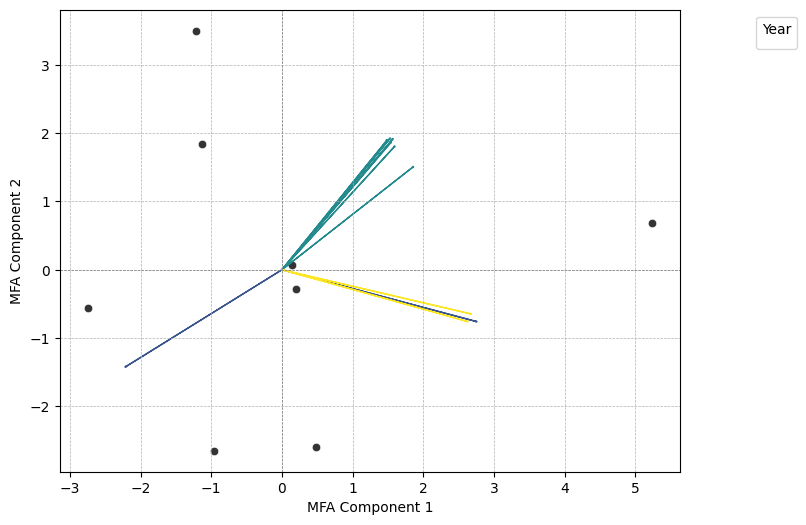

In [157]:
# Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of individuals, colored by year
sns.scatterplot(data=mfa_results, x=mfa_results.iloc[:, 0], y=mfa_results.iloc[:, 1], alpha=0.8, color='black')

# Define a scaling factor to extend the arrows
scaling_factor = 3  # Adjust this value to control arrow length

# Create a color map based on the group and intensity (Total Contribution)
norm = plt.Normalize(vmin=top_loadings['Loadings Contribution'].min(), vmax=top_loadings['Loadings Contribution'].max())  # Normalize based on Loadings Contribution
sm = plt.cm.ScalarMappable(cmap='Greys', norm=norm)
sm.set_array([])


# Plot the top loadings as arrows with colors based on the group and intensity by Total Contribution
for i, row in top_loadings.iterrows():
    # Color based on group
    group_color = group_colors.get(row['group'], 'black')  # Default to black if group is not found
    # Scale the arrow by Loadings Contribution
    intensity = norm(row['Loadings Contribution'])
    
    ax.arrow(0, 0, row["MFA Comp 1"] * scaling_factor, row["MFA Comp 2"] * scaling_factor, 
             head_width=0.02, head_length=0.02, color=group_color, length_includes_head=True)

# Formatting
ax.axhline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel("MFA Component 1")
ax.set_ylabel("MFA Component 2")
ax.set_title("")


# Show grid and legend
ax.grid(True, linestyle="--", linewidth=0.5)
ax.legend(title="Year", bbox_to_anchor=(1.2, 1))

plt.show()
